<h3>Here We import The nesseary, libaries<h3>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from src.KNNClassifier  import KNNClassfier
from src.utilities import trainTestSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

<h3>Add and load datasets saved to dataframe<h3>


In [4]:
#here we load the data
x_dataframe = pd.read_csv('~/dev/KNNIMPLIMENTATION/Dataset/X_train.csv')
y_dataframe = pd.read_csv('~/dev/KNNIMPLIMENTATION/Dataset/Y_train.csv')

<h3>Drop first columns for index of data frame and converting to numpy array<h3>


In [5]:
x_dataframe.drop(x_dataframe.columns[[0]], axis = 1, inplace = True)
y_dataframe.drop(y_dataframe.columns[[0]], axis = 1, inplace = True)


<h3>Convert to numpy array<h3>


In [6]:

y_dataSet=y_dataframe.to_numpy( dtype=None, copy=False)
x_dataSet=x_dataframe.to_numpy( dtype=None, copy=False)

<h3>Perform train test split using our module<h3>


In [7]:
x_train,label_train,x_test,label_test=trainTestSplit(x_dataSet,y_dataSet,0.8)

80.0 percentage split with 768 samples and 614 training data         and 154 number of test


<h3>We build the model using the KNN Classifier class<h3>
<P>We then cache in the data using the fit method<p>

In [8]:
model=KNNClassfier()
model.fit(x_train, label_train,metrics="euclidian_distance")

<h3>Now we try out diffrent K values to get the one iwith bes result and we also try multiple data preprocessing<h3>

<p> First without scaling the data<p>

In [9]:
max_acc=-2
k_=1
for k in range(1,30):
    predictions = model.predict(x_test, k)
    acc=model.accuracy(predictions, label_test)
    if acc>max_acc:
        max_acc=acc
        k_=k
    # max_v=max(model.accuracy(predictions, label_test) ,max_v)


print("Accuracy =", (max_acc)*100, "%" ) 
print("K value =", (k_) ) 

Accuracy = 74.67532467532467 %
K value = 20


<p>Next with Standard Scalar<p>


In [10]:
#code adapted from Jason Brownlee, 2022
sc_x=StandardScaler()
x_train_standard =sc_x.fit_transform(x_train) 
x_test_standard = sc_x.transform(x_test)
#end of adapted code

In [11]:
model=KNNClassfier()
model.fit(x_train_standard, label_train)

max_acc=-2
k_=1
for k in range(1,30):
    predictions = model.predict(x_test_standard, k)
    acc=model.accuracy(predictions, label_test)
    if acc>max_acc:
        max_acc=acc
        k_=k
    # max_v=max(model.accuracy(predictions, label_test) ,max_v)


print("Accuracy =", (max_acc)*100, "%" ) 
print("K value =", (k_) ) 

Accuracy = 78.57142857142857 %
K value = 21


<p>Finally with Min max Scaler<p>

In [12]:
sc_x=MinMaxScaler()
x_train_minmax =sc_x.fit_transform(x_train) 
x_test_minmax = sc_x.transform(x_test)


In [13]:
model=KNNClassfier()
model.fit(x_train_minmax, label_train)

max_acc=-2
k_=1
for k in range(1,30):
    predictions = model.predict(x_test_minmax, k)
    acc=model.accuracy(predictions, label_test)
    if acc>max_acc:
        max_acc=acc
        k_=k
    # max_v=max(model.accuracy(predictions, label_test) ,max_v)


print("Accuracy =", (max_acc)*100, "%" ) 
print("K value =", (k_) ) 

Accuracy = 77.92207792207793 %
K value = 15


In [14]:
sc_x=StandardScaler()
x_train_standard =sc_x.fit_transform(x_train) 
x_test_standard = sc_x.transform(x_test)


model=KNNClassfier()
model.fit(x_train_standard, label_train)

predictions = model.predict(x_test_standard, k=21)



In [15]:

cf_matrix=confusion_matrix(label_test, predictions)
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        99
           1       0.81      0.53      0.64        55

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



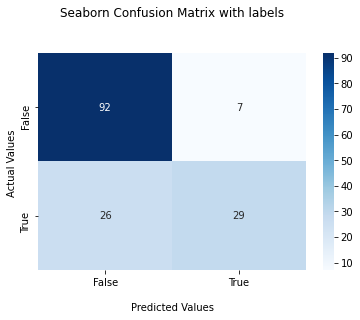

In [20]:
# adapted from Vikram Aruchamy,2021

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
#end of adaptation